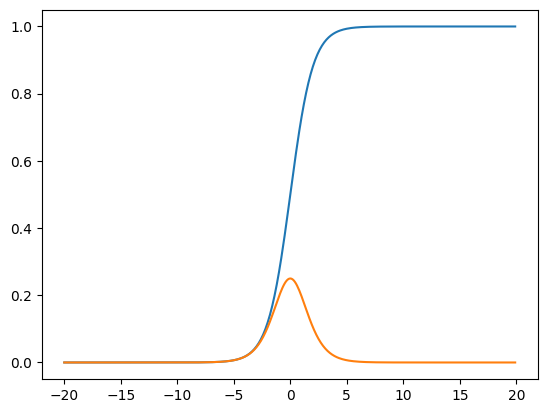

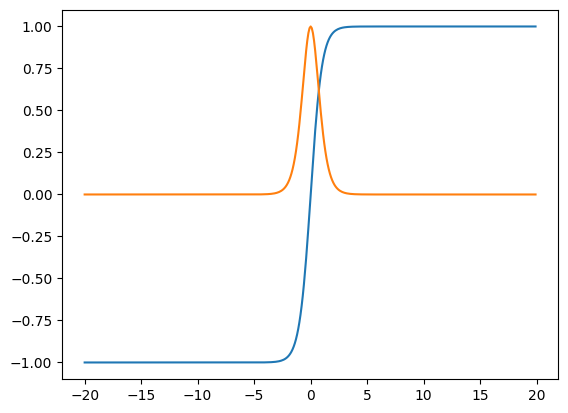

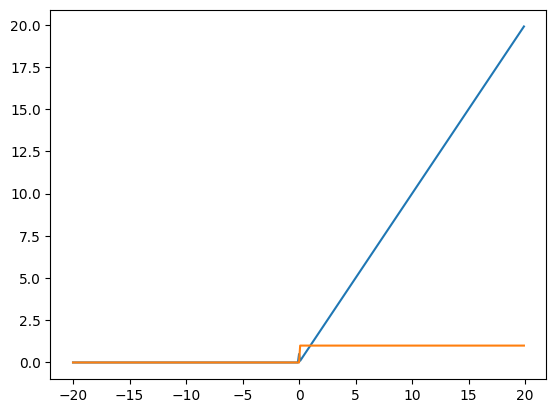

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plot_x = np.array(list(range(-200, 200)))
plot_x = plot_x/10

def plot_func(x, y, y1):
  print()
  plt.plot(x, y)
  plt.plot(x, y1)
  plt.show()
  print()

def sigmoid(x):
  return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
  return np.exp(-x)/((1+np.exp(-x))**2)

plot_func(plot_x, sigmoid(plot_x), derivative_sigmoid(plot_x))


def tanH(x):
  return np.tanh(x)

def derivative_tanH(x):
  return 1/(np.cosh(x))**2

plot_func(plot_x, tanH(plot_x), derivative_tanH(plot_x))


def ReLu(x):
  x = np.where(x==0, 0.5, x)
  x = np.where(x<0, 0, x)
  return x

def derivative_ReLu(x):
  return np.where(x<=0, 0, 1)

plot_func(plot_x, ReLu(plot_x), derivative_ReLu(plot_x))


def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

def derivative_softmax(x):
  return derivative_sigmoid(x)

In [2]:
x = np.array([ [0, 1.0], [1.0, 0], [1.0, 1.0],[0, 0] ])
y = np.array([ [1.0], [1.0], [0], [0]])


num_input = 2
num_hidden = 5
num_output = 1

self._weights[i] += updates[-1]
self.bias[i] += biases[-1]

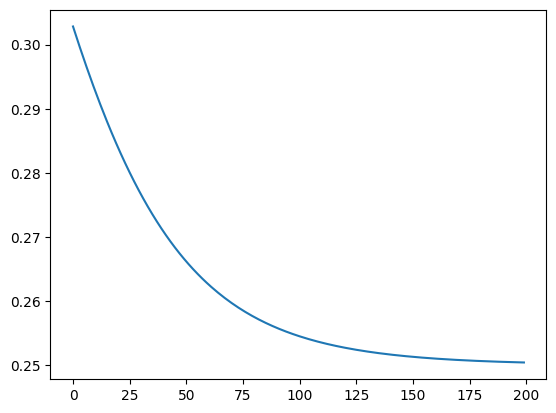

In [11]:
class NeuralNetwork:
  def __init__(self, layers: tuple) -> None:
      self.weights = [np.zeros((layers[i-1], layers[i])) for i in range(1, len(layers))]
      self.b = [np.ones(x) for x in layers[1:]]
      self.layers = layers
      self.cost = []

  def feed_forward(self, input):
    inputarr = [input]
    output = []
    for i in range(len(self.layers)-1):
        input = np.dot(input, self.weights[i]) + self.b[i]
        output.append(input)
        input = sigmoid(input)
        inputarr.append(input)
    return inputarr, output

  def back_propagation(self, alpha, y, inparr, outarr):
    error = y - (inparr[-1])
    self.weights[1] += alpha*error*np.dot(inparr[2], derivative_sigmoid(outarr[1]))
    self.weights[0] += alpha*error*np.dot(np.dot(self.weights[1], derivative_sigmoid(outarr[1])), np.dot(inparr[1], derivative_sigmoid(outarr[0])))
    return error

  def train(self, epoch, alpha, x, y):
    for j in range(epoch):
      #self.stochastic_grad(alpha, x, y)
      self.batch_grad(alpha, x, y)

  def stochastic_grad(self, alpha, x, y):
    error = []
    for i in range(len(x)):
      inparr, outarr = self.feed_forward(x[i])
      #print(inparr, outarr, sep="\n", end="\n\n")
      error.append(self.back_propagation(alpha, y[i], inparr, (outarr))**2)
    self.cost.append(sum(error)/len(error))

  def batch_grad(self, alpha, x, y):
    ferr = []
    _error = []
    for i in range(len(x)):
      inparr, outarr = self.feed_forward(x[i])
      error = y[i] - inparr[-1]
      ferr.append(error**2)
      _error.append(alpha*error*np.dot(inparr[2], derivative_sigmoid(outarr[1])))
    self.weights[1] += sum(_error)/len(_error)
    _error = []
    for i in range(len(x)):
      inparr, outarr = self.feed_forward(x[i])
      error = y[i] - inparr[-1]
      ferr.append(error**2)
      _error.append(alpha*error*np.dot(np.dot(self.weights[1], derivative_sigmoid(outarr[1])), np.dot(inparr[1], derivative_sigmoid(outarr[0]))))
    self.weights[0] += (sum(_error)/len(_error))
    #return sum(ferr)/len(ferr)
    self.cost.append(sum(ferr)/len(ferr))


_x = np.array([ [0, 1], [1, 0], [1, 1], [0, 0] ])
_y = np.array([ [1], [1], [0], [0]])

nn = NeuralNetwork((2, 5, 1))
nn.train(200, 0.1, _x, _y)

plt.plot(list(range(len(nn.cost))), nn.cost)
plt.show()



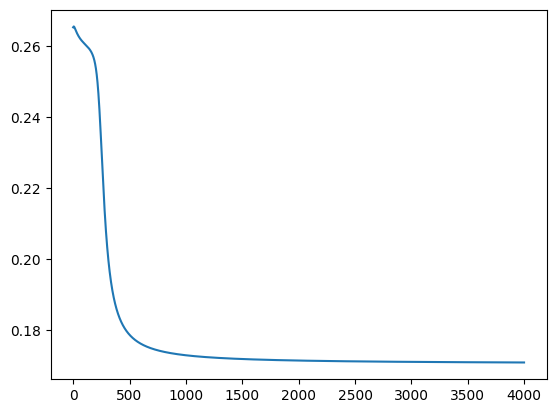

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, layers: tuple, activation_func, derivative_func) -> None:
        self._layers = layers
        self._weights = [np.zeros((layers[i], layers[i+1])) for i in range(len(layers)-1)]
        self.bias = [np.zeros(x) for x in layers[1:]]
        self.activation_func = activation_func
        self.derivative_func = derivative_func
        self.cost = []

    def feed_forward(self, x):
        for i in range(len(self._weights)):
            x = self.activation_func(np.dot(x, self._weights[i]) + self.bias[i])
        return x

    def back_propagation(self, alpha, x, y):
        inputs = [x]
        outputs = [x]
        for i in range(len(self._weights)):
            x = np.dot(x, self._weights[i]) + self.bias[i]
            inputs.append(x)
            x = self.activation_func(x)
            outputs.append(x)
        error = y - outputs[-1]
        updates = []
        biases = []
        for i in range(len(self._weights)-1, -1, -1):
            if i==len(self._weights)-1:
                update = alpha*error*np.dot(outputs[i], self.derivative_func(inputs[i]))
                updates.append(update)
                biases.append(alpha*error)
            else:
                update = np.dot( np.dot( np.divide(updates[-1], outputs[i+1]), self._weights[i+1]) , np.dot(outputs[i], self.derivative_func(inputs[i])) )
                updates.append(update)
                biases.append( np.dot(self._weights[i+1], biases[-1]))
        updates.reverse()
        biases.reverse()
        return updates, biases, error

    def stochastic_gradient_descent(self, x, y, alpha):
        errors = []
        for i in range(len(x)):
            updates, biases, error = self.back_propagation(alpha, x[i], y[i])
            errors.append(error**2)
            for j in range(len(self._weights)):
                self._weights[j] += updates[j]
                self.bias[j] += biases[j]
        self.cost.append(sum(errors)/len(errors))


    def train(self, x, y, alpha, epochs, gradient="stochastic"):
        if gradient=="stochastic":
            func = self.stochastic_gradient_descent
        elif gradient == "batch":
            func = self.batch_gradient_descent

        for j in range(epochs):
            func(x, y, alpha)

    def sigmoid(x):
        return 1/(1+np.exp(-x))

    def derivative_sigmoid(x):
        return np.exp(-x)/((1+np.exp(-x))**2)



if __name__ == "__main__":
    _x = np.array([ [0, 1], [1, 0], [1, 1], [0, 0] ])
    _y = np.array([ [1], [1], [0], [0]])

    nn = NeuralNetwork((2, 5, 1), sigmoid, derivative_sigmoid)
    nn.train(_x, _y, 0.1, 4000)

    plt.plot(list(range(len(nn.cost))), nn.cost)
    plt.show()